<center><h1><b><u>Handwrittern Digit Recognition using CNN</u></b></h1></center>

Importing required libraries.

In [75]:
# deeper cnn model for mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

load_dataset(): Loads data set and converts to categorical form for model to understand.

In [84]:
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

prep_pixel(): Preprocessing the image.

In [ ]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

define_model(): Creating a convolutional model with Convolutional layer,MaxPool layer and Dense layer.

In [ ]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(MaxPooling2D((2, 2)))
 
 #Neural Network Part
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [ ]:
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	model = 0
	folds = 0
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY))
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print("K_Fold ",folds)
		print('> %.3f \n' % (acc * 100.0))
		folds = folds + 1
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories, model

In [ ]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		plt.subplot(2, 1, 1)
		plt.title('Cross Entropy Loss')
		plt.plot(histories[i].history['loss'], color='blue', label='train')
		plt.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		plt.subplot(2, 1, 2)
		plt.title('Classification Accuracy')
		plt.plot(histories[i].history['accuracy'], color='blue', label='train')
		plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	plt.show()

In [ ]:
# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	plt.boxplot(scores)
	plt.show()

In [ ]:
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
  trainX, trainY, testX, testY = load_dataset()
  # prepare pixel data
  trainX, testX = prep_pixels(trainX, testX)
  # evaluate model
  scores, histories, model = evaluate_model(trainX, trainY)
  # learning curves
  summarize_diagnostics(histories)
  # summarize estimated performance
  summarize_performance(scores)
  model.summary()
  return model

Epoch 1/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.1362 - accuracy: 0.9576 - val_loss: 0.0677 - val_accuracy: 0.9790
Epoch 2/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0439 - accuracy: 0.9861 - val_loss: 0.0580 - val_accuracy: 0.9811
Epoch 3/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0301 - accuracy: 0.9903 - val_loss: 0.0471 - val_accuracy: 0.9854
Epoch 4/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0219 - accuracy: 0.9928 - val_loss: 0.0453 - val_accuracy: 0.9873
Epoch 5/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0160 - accuracy: 0.9949 - val_loss: 0.0379 - val_accuracy: 0.9883
Epoch 6/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0116 - accuracy: 0.9964 - val_loss: 0.0456 - val_accuracy: 0.9874
Epoch 7/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0079 - accuracy: 0.9977 - val_loss: 0.0503 - val_ac

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


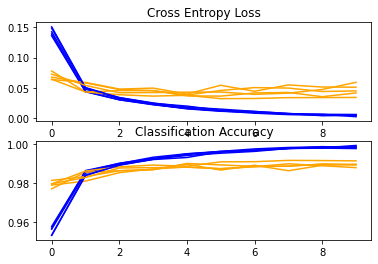

Accuracy: mean=98.965 std=0.111, n=5


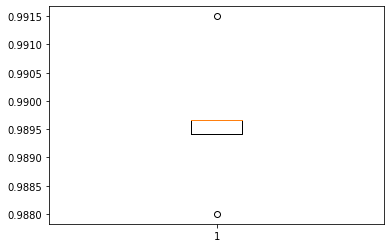

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 conv2d_53 (Conv2D)          (None, 9, 9, 64)          36928     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 flatten_17 (Flatten)        (None, 1024)            

In [ ]:
# model = run_test_harness()



model.load('mnist.h5')
# entry point, run the test harness
trainX, trainY, testX, testY = load_dataset()
model = run_test_harness()

model.summary()
# model.save('mnist.h5')


<h3><b><u>Confusion Matrix</u></b></h3> 
(For evaluating the performance of a classification model)

Text(69.0, 0.5, 'Truth')

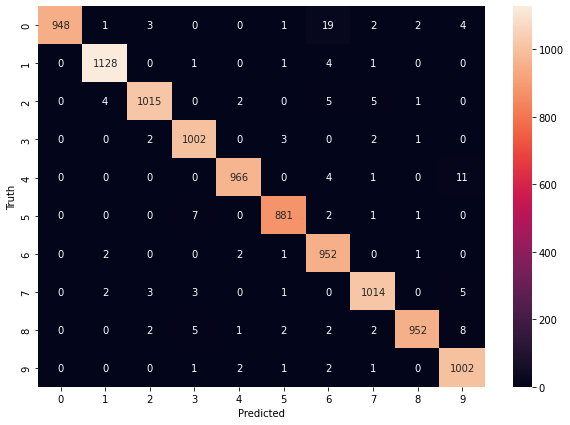

In [ ]:
#confusion matrix

import numpy as np
import tensorflow as tf
import seaborn as sn
y_predicted = model.predict(testX)
true = [np.argmax(i) for i in testY]
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=true,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3><b><u>Visualization of Neural Network</u></b></h3> 

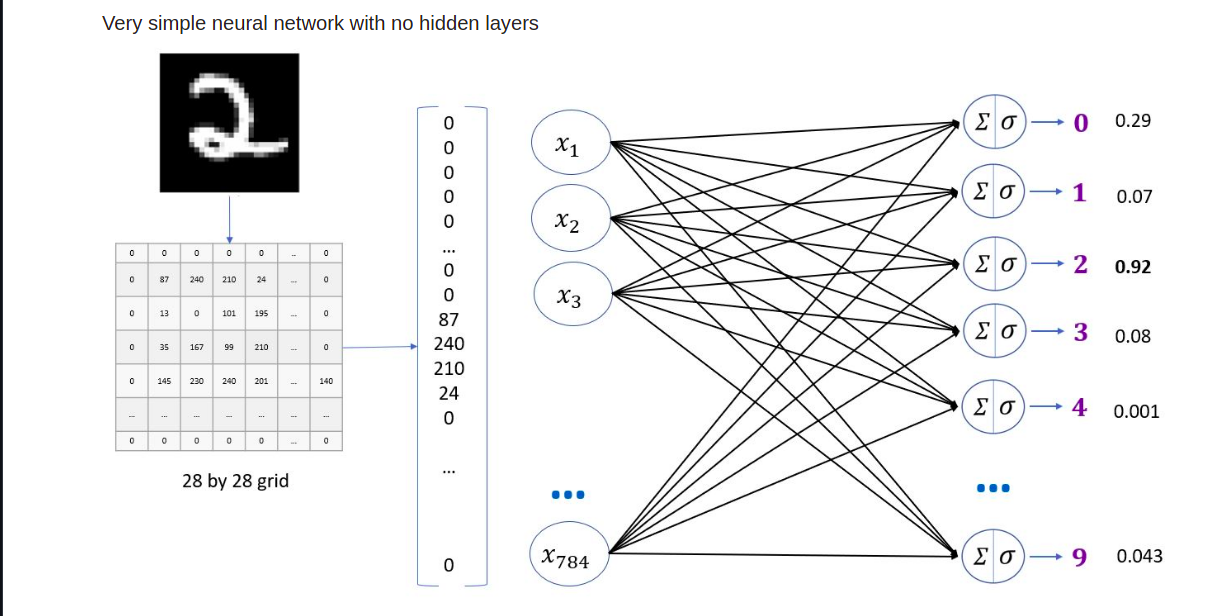

<h3><b><u>MNIST Dataset</u></b></h3> 

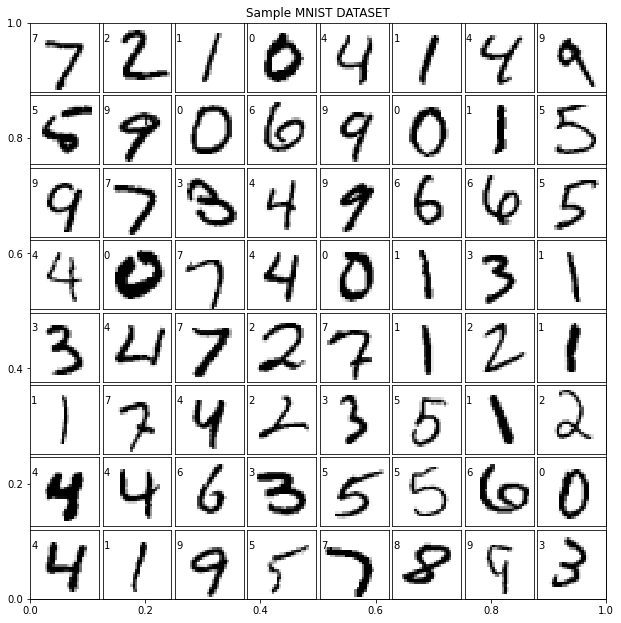

In [ ]:
# Print Images
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
plt.title('Sample MNIST DATASET')
# plot the digits: each image is 28x28 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(testX[i].reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(true[i]))
plt.show()
print("")

<h3><b><u>Making Prediction of Uploaded Image</u></b></h3> 

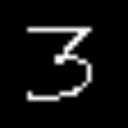


Predicted Digit in Image :  3


In [96]:
# make a prediction for a new image.
from numpy import argmax
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from google.colab.patches import cv2_imshow
from keras.models import load_model
import cv2 as cv
import numpy as np
# load and prepare the image
def load_image(filename):
  # load the image
  img1 = cv.imread(filename,0)
  
  img1 = cv.resize(img1,(28,28))
  ret,thresh = cv.threshold(img1,130,255,cv.THRESH_BINARY_INV)
  thresh1 = thresh[np.newaxis,..., np.newaxis]
  thresh2 = thresh[..., np.newaxis]
  # print(thresh.shape)
  img = thresh1 / 255.0
  return img, thresh2
 
# load an image and predict the class
def run_example():
  # load the image
  img, thresh = load_image('3.jpeg')
  thresh = cv.resize(thresh,(128,128))
  cv2_imshow( thresh)
  # load model
  model = load_model('mnist.h5')
  # predict the class
  predict_value = model.predict(img)
  digit = argmax(predict_value)
  print()
  print("Predicted Digit in Image : ",digit)
 
# entry point, run the example
run_example()